# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
import cv2 # нужно поставить себе cv2 через conda install opencv
import warnings
warnings.filterwarnings("ignore")

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

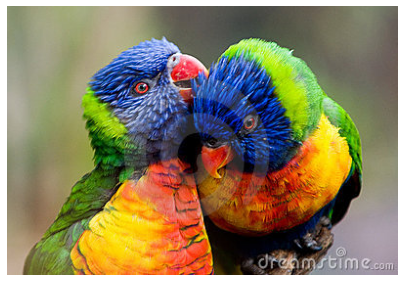

In [ ]:
img = cv2.imread("C:\\Users\\Anton\\Downloads\\two-lorikeet-birds-2293918.jpg") # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


In [ ]:
def make_clusters(model, img, models, func, print_images=False):
    img_start = img.copy()
    img = img.reshape(275 * 400, 3)
    ans = model.fit_predict(img)
    mean_cluster = {}
    for i in range(img.shape[0]):
        if (ans[i] not in mean_cluster):
            mean_cluster[ans[i]] = img[i]
        else:
            mean_cluster[ans[i]] = np.vstack((mean_cluster[ans[i]], img[i]))
    for elem in mean_cluster:
        mean_cluster[elem] = func(mean_cluster[elem])
    for i in range(img.shape[0]):
        img[i] = mean_cluster[ans[i]]
    img = img.reshape(275, 400, 3)
    if print_images:
        draw_picture(img)
    img_start = cv2.imread("C:\\Users\\Anton\\Downloads\\two-lorikeet-birds-2293918.jpg")
    print(compare_ssim(img, img_start, multichannel=True))
    models.append((compare_ssim(img, img_start, multichannel=True), model))

In [ ]:
def median(a):
    return np.median(a, axis=0)

def centroid(a):
    return a.mean(axis=0)

Найдём лучший если за функцию взять median
0.5360228310989382
0.5613847828493562
0.6818770627060345
0.7655472745997237
Лучшая из KMeans с картинкой:


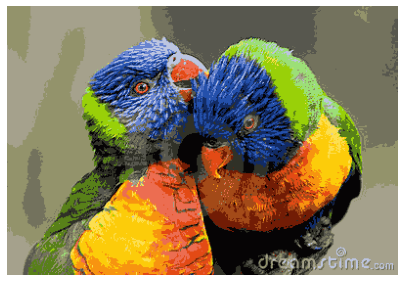

0.7652266271809717
Найдём лучший если за функцию взять centroid
0.5332849674030117
0.5632580935710463
0.679059333005926
0.7594172753247515
Лучшая из KMeans с картинкой:


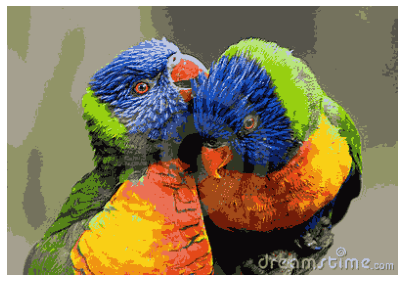

0.7588456702267651


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
best_models = []
for func in [median, centroid]:
    models = []
    print(f"Найдём лучший если за функцию взять {func.__name__}")
    for n in [2, 3, 10, 20]:
        model = KMeans(n_clusters=n)
        make_clusters(model, img.copy(), models, func)
    models.sort()
    print("Лучшая из KMeans с картинкой:")
    make_clusters(models[-1][1], img.copy(), models, func, print_images=True)
    best_models += models

Найдём лучший если за функцию взять median
eps = 5, min_sample = 2: 0.44503385390264727
eps = 5, min_sample = 3: 0.4346492956222774
eps = 5, min_sample = 4: 0.4313814070310376
eps = 5, min_sample = 5: 0.428835914037433
eps = 5, min_sample = 6: 0.4258986826072493
eps = 6, min_sample = 2: 0.4331091823647959
eps = 6, min_sample = 3: 0.4266415868490682
eps = 6, min_sample = 4: 0.4243477563381126
eps = 6, min_sample = 5: 0.42495394957163407
eps = 6, min_sample = 6: 0.42492073010422143
eps = 7, min_sample = 2: 0.4244499834884514
eps = 7, min_sample = 3: 0.4204278874197937
eps = 7, min_sample = 4: 0.420355946213131
eps = 7, min_sample = 5: 0.42021188529231024
eps = 7, min_sample = 6: 0.41909698511109533
eps = 8, min_sample = 2: 0.4166771791239285
eps = 8, min_sample = 3: 0.4134729030921369
eps = 8, min_sample = 4: 0.4157780120082027
eps = 8, min_sample = 5: 0.41589862718405834
eps = 8, min_sample = 6: 0.4156701452711733
eps = 9, min_sample = 2: 0.41351545311478405
eps = 9, min_sample = 3: 0.4

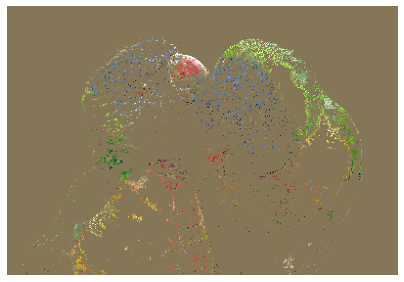

0.44503385390264727
Найдём лучший если за функцию взять centroid
eps = 5, min_sample = 2: 0.4463168394886024
eps = 5, min_sample = 3: 0.4367838833076087
eps = 5, min_sample = 4: 0.4353101165077724
eps = 5, min_sample = 5: 0.43449702314700867
eps = 5, min_sample = 6: 0.43429536492959864
eps = 6, min_sample = 2: 0.43310284218701445
eps = 6, min_sample = 3: 0.4271166243421595
eps = 6, min_sample = 4: 0.4255876410651787
eps = 6, min_sample = 5: 0.4269316143561852
eps = 6, min_sample = 6: 0.42793120550550784
eps = 7, min_sample = 2: 0.4237831580750607
eps = 7, min_sample = 3: 0.42005768347116357
eps = 7, min_sample = 4: 0.4204189719725588
eps = 7, min_sample = 5: 0.42075046348624784
eps = 7, min_sample = 6: 0.4203265243115577
eps = 8, min_sample = 2: 0.4156143799020327
eps = 8, min_sample = 3: 0.4126255047419691
eps = 8, min_sample = 4: 0.41524983855288017
eps = 8, min_sample = 5: 0.41562327999282517
eps = 8, min_sample = 6: 0.4158233811970442
eps = 9, min_sample = 2: 0.4123787638165384
eps

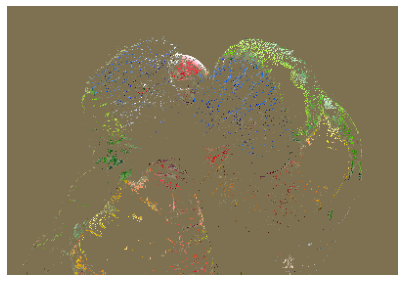

0.4463168394886024


In [ ]:
from sklearn.cluster import DBSCAN
for func in [median, centroid]:
    models = []
    print(f"Найдём лучший если за функцию взять {func.__name__}")
    for eps_test in range(5, 15):
        for samples in range(2, 7):
            model = DBSCAN(eps=eps_test, min_samples=samples)
            print(f"eps = {eps_test}, min_sample = {samples}:", end=" ")
            make_clusters(model, img.copy(), models, func, print_images=False)
    print("Лучшая из DBSCAN с картинкой:")
    models.sort()
    make_clusters(models[-1][1], img.copy(), models, func, print_images=True)
    best_models += models

In [ ]:
from sklearn.cluster import AgglomerativeClustering
for func in [median, centroid]:
    models = []
    print(f"Найдём лучший если за функцию взять {func.__name__}")
    for n in [2, 3, 10, 20]:
        link = 'average'
        model = AgglomerativeClustering(n_clusters=n, linkage=link)
        print(f"n_clusters = {n}, linkage = {link}:", end=" ")
        make_clusters(model, img.copy(), models, func, print_images=False)
    print("Лучшая из AgglomerativeClustering с картинкой:")
    models.sort()
    make_clusters(models[-1][1], img.copy(), models, func, print_images=True)
    best_models += models

#ОООчень долго, но по логике там будет хуже KMeans, так как точек очень много итераций нужно для нормальной картинки, ведь точек очень много, я компилил 1.5 часа и даже первая не скомплилась, а их 8!!!
#Мб надо было делать в колабе или на кагле а не в VS, ну мне уже лень)

Найдём лучший если за функцию взять median
n_clusters = 2, linkage = average: 

In [ ]:
best_models.sort(reverse=True)
print(f"best_model: {best_models[0][1]}, SSIM: {best_models[0][0]}")

best_model: KMeans(n_clusters=20), SSIM: 0.7655472745997237


Видно, что KMeans сильно лучше других, поэтому на моём я запущу только его 

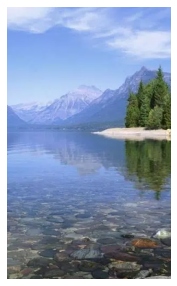

In [ ]:
img = cv2.imread("C:\\Users\\Anton\\Downloads\\screen-0 (1).jpg") # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
img.shape

(500, 300, 3)

In [ ]:
def make_clusters_2(model, img, models, func, print_images=False): #размер другой
    img_start = img.copy()
    img = img.reshape(500 * 300, 3)
    ans = model.fit_predict(img)
    mean_cluster = {}
    for i in range(img.shape[0]):
        if (ans[i] not in mean_cluster):
            mean_cluster[ans[i]] = img[i]
        else:
            mean_cluster[ans[i]] = np.vstack((mean_cluster[ans[i]], img[i]))
    for elem in mean_cluster:
        mean_cluster[elem] = func(mean_cluster[elem])
    for i in range(img.shape[0]):
        img[i] = mean_cluster[ans[i]]
    img = img.reshape(500, 300, 3)
    if print_images:
        draw_picture(img)
    img_start = cv2.imread("C:\\Users\\Anton\\Downloads\\screen-0 (1).jpg")
    print(compare_ssim(img, img_start, multichannel=True))
    models.append((compare_ssim(img, img_start, multichannel=True), model, img))

Найдём лучший если за функцию взять median
0.5863422072011009
0.6429384033469452
0.8143490611991332
0.8734049488050193
Лучшая из KMeans с картинкой:


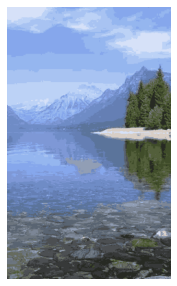

Найдём лучший если за функцию взять centroid
0.5860488783323209
0.6422958028175119
0.8114179468352329
0.874422943412483
Лучшая из KMeans с картинкой:


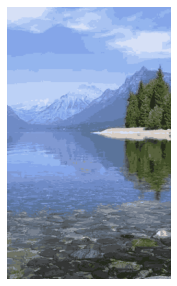

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
best_models = []
for func in [median, centroid]:
    models = []
    print(f"Найдём лучший если за функцию взять {func.__name__}")
    for n in [2, 3, 10, 20]:
        model = KMeans(n_clusters=n)
        make_clusters_2(model, img.copy(), models, func)
    models.sort()
    print("Лучшая из KMeans с картинкой:")
    draw_picture(models[-1][2])
    best_models += models

Так как почти всё синие то почти достаточно палитры из 20 цветов, попробуем на супер цветастой картинке.

In [ ]:
def make_clusters_3(model, img, models, func, print_images=False): #размер другой
    img_start = img.copy()
    img = img.reshape(500 * 300, 3)
    ans = model.fit_predict(img)
    mean_cluster = {}
    for i in range(img.shape[0]):
        if (ans[i] not in mean_cluster):
            mean_cluster[ans[i]] = img[i]
        else:
            mean_cluster[ans[i]] = np.vstack((mean_cluster[ans[i]], img[i]))
    for elem in mean_cluster:
        mean_cluster[elem] = func(mean_cluster[elem])
    for i in range(img.shape[0]):
        img[i] = mean_cluster[ans[i]]
    img = img.reshape(500, 300, 3)
    if print_images:
        draw_picture(img)
    img_start = cv2.imread("C:\\Users\\Anton\\Downloads\\screen-1.jpg")
    print(compare_ssim(img, img_start, multichannel=True))
    models.append((compare_ssim(img, img_start, multichannel=True), model, img))

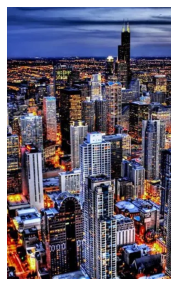

In [ ]:
img = cv2.imread("C:\\Users\\Anton\\Downloads\\screen-1.jpg") # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
img.shape

(500, 300, 3)

Найдём лучший если за функцию взять median
0.14777548071319105
0.11190171059046167
0.10283656841014972
0.09677307585157906
Лучшая из KMeans с картинкой:


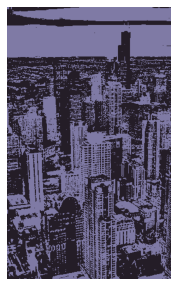

Найдём лучший если за функцию взять centroid
0.15119398048183888
0.11463570632277115
0.10392763133621881
0.09609700707303996
Лучшая из KMeans с картинкой:


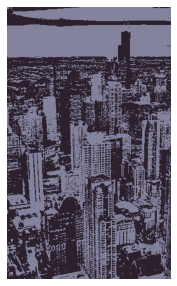

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
best_models = []
for func in [median, centroid]:
    models = []
    print(f"Найдём лучший если за функцию взять {func.__name__}")
    for n in [2, 3, 10, 20]:
        model = KMeans(n_clusters=n)
        make_clusters_2(model, img.copy(), models, func)
    models.sort()
    print("Лучшая из KMeans с картинкой:")
    draw_picture(models[-1][2])
    best_models += models

[Текст ссылки](https://)Вооот, здесь всё пестрит, поэтому такая палитра слишком маленькая. Удивительно, что score убывает, я так и не понял с чем это связано

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [19]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [4]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [5]:
y.shape

(2370,)

In [6]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

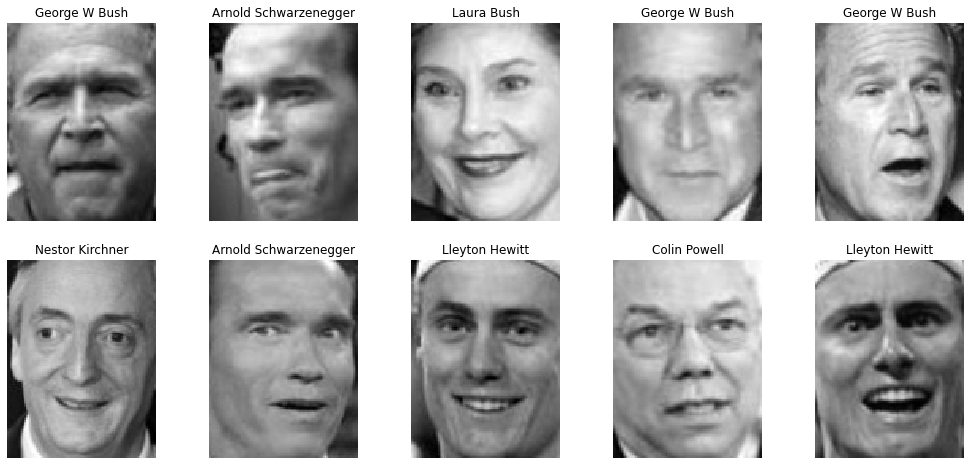

In [7]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)
c = pca.fit(X_train)
X_train_pca_1000 = c.transform(X_train)
X_test_pca_1000 = c.transform(X_test)
X_train.shape, X_test.shape

((1896, 11750), (474, 11750))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lg = LogisticRegression(max_iter=3000)
lg.fit(X_train_pca_1000, y_train)
print(f1_score(y_test, lg.predict(X_test_pca_1000), average='macro'))

0.6750325603440349


In [15]:
from collections import Counter

Counter(y) #лучше всего взять константу 31, так как её больше всех

Counter({0: 39,
         1: 35,
         2: 36,
         3: 77,
         4: 42,
         5: 236,
         6: 31,
         7: 121,
         8: 530,
         9: 109,
         10: 44,
         11: 30,
         12: 39,
         13: 71,
         14: 52,
         15: 55,
         16: 42,
         17: 53,
         18: 31,
         19: 60,
         20: 32,
         21: 41,
         22: 41,
         23: 48,
         24: 33,
         25: 37,
         26: 30,
         27: 32,
         28: 52,
         29: 33,
         30: 33,
         31: 144,
         32: 32,
         33: 49})

In [17]:
import numpy as np

y_pred = np.ones(y_test.shape) * 31
print(f1_score(y_test, y_pred, average='macro')) #явно лучше с пожатами координатами

0.003937007874015748


Попробуем увеличить accuracy

In [24]:
best = 0
for n in [1000, 1300, 1500]:
  X = lfw_people.data
  y = lfw_people.target
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
  pca = PCA(n_components=n)
  c = pca.fit(X_train)
  X_train_pca_1000 = c.transform(X_train)
  X_test_pca_1000 = c.transform(X_test)
  lg = LogisticRegression(max_iter=3000)
  lg.fit(X_train_pca_1000, y_train)
  ans = f1_score(y_test, lg.predict(X_test_pca_1000), average='macro')
  print(ans)
  best = max(best, ans)
best

0.6596684874368732
0.6699836888007451
0.668835630212303


0.6699836888007451

Это конечно круто, но давайте попробуем совсем мало признаков

In [25]:
best = 0
for n in [2, 3, 4, 5]:
  X = lfw_people.data
  y = lfw_people.target
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
  pca = PCA(n_components=n)
  c = pca.fit(X_train)
  X_train_pca_1000 = c.transform(X_train)
  X_test_pca_1000 = c.transform(X_test)
  lg = LogisticRegression(max_iter=3000)
  lg.fit(X_train_pca_1000, y_train)
  ans = f1_score(y_test, lg.predict(X_test_pca_1000), average='macro')
  print(ans)
  best = max(best, ans)
best

0.016955017301038062
0.027314887588935174
0.047321867583045074
0.053672756658105995


0.053672756658105995

Воот уже не сильно хуже константы. Однако на 2d и 3d можно попробовать TSNE



In [29]:
from sklearn.manifold import TSNE

best = 0
for n in [2, 3]:
  X = lfw_people.data
  y = lfw_people.target
  X = TSNE(n_components=n).fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
  lg = LogisticRegression(max_iter=3000)
  lg.fit(X_train, y_train)
  ans = f1_score(y_test, lg.predict(X_test), average='macro')
  print(ans)
  best = max(best, ans)
best

0.02133291308053772
0.03442372862623525


0.03442372862623525


Удивительно, но 3D лучше(но был запуск когда 2D был лучше, ещё раз убеждаемся в Недетерминированности). Посмотрим на ошибки


In [30]:
lg = LogisticRegression(max_iter=3000)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

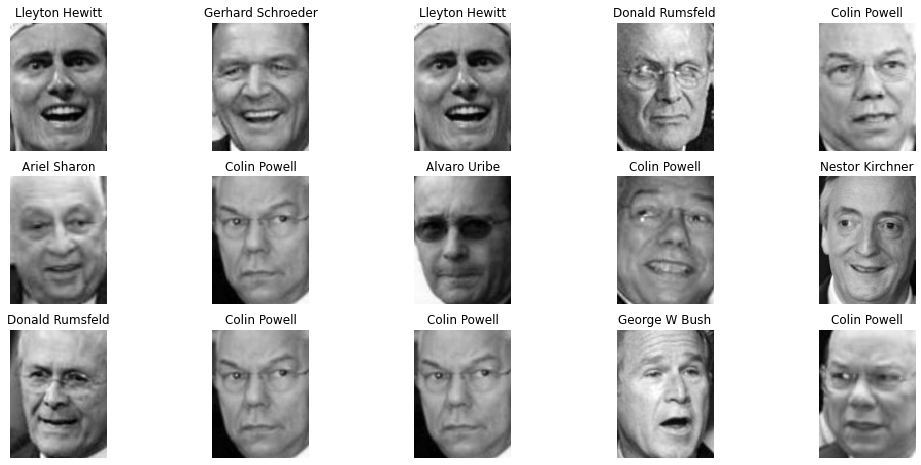

In [31]:
plot_grid(y_test[y_pred != y_test][:15], nrows=3, ncols=5)# первые 15 лиц

Я никого кроме Буша не знаю, но фотка с ним +- узнаваемая. Однако не самая лучшая значит прогресс есть.

Я воспользовался обеими, TSNA показал себе чуть чуть лучше

In [32]:
X = lfw_people.data
y = lfw_people.target
X = TSNE(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2, random_state=42)
lg = LogisticRegression(max_iter=3000)
lg.fit(X_train, y_train)
ans = f1_score(y_test, lg.predict(X_test), average='macro')
print(ans)

0.025876660704644054


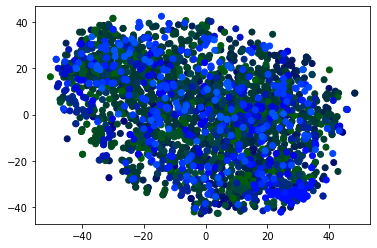

In [34]:
for i in range(34):
  color = plt.cm.gist_ncar(i)
  plt.scatter(X[:, 0][y == i],
              X[:, 1][y == i],
              c=[color] * len(X[:, 0][y == i]))

Нуууууууууу они кучкуються вроде |-><-|. Ладно вообще так себе, но плохой результат тоже результат. Поэтому тут не подпишишь. Попробуем PCA

In [35]:
X = lfw_people.data
y = lfw_people.target
X = PCA(n_components=2).fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2, random_state=42)
lg = LogisticRegression(max_iter=3000)
lg.fit(X_train, y_train)
ans = f1_score(y_test, lg.predict(X_test), average='macro')
print(ans)

0.018918275121737077


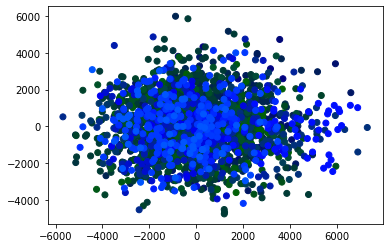

In [36]:
for i in range(34):
  color = plt.cm.gist_ncar(i)
  plt.scatter(X[:, 0][y == i],
              X[:, 1][y == i],
              c=[color] * len(X[:, 0][y == i]))

Не ну тут всё ещё хуже. Наверное я что-то делал не так. Но я этого не знаю.